# Exploratory Data Analysis - Flowers Recognition
## Introduction
This notebook presents an **exploratory data analysis (EDA)** of the Flowers Recognition dataset from Kaggle. The goal is to understand the dataset, explore its characteristics, and guide subsequent preprocessing and modeling steps.

**Dataset:** Flowers Recognition (Kaggle)

**Objective:** Understand the dataset and extract insights to guide preprocessing and modeling

**Author:** NGUYEN Ngoc Dang Nguyen - Final-year Student in Computer Science, Aix-Marseille University

**EDA steps:**
1. Load and preview the raw dataset
2. Dataset overview and statistics
3. Class distribution analysis
4. Image dimensions & aspect ratio analysis
5. Sample visualization
6. Data quality check
7. Key insights and recommendations

## 1. Load Libraries and Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Define data path
DATA_PATH = r"C:\Users\nndng\OneDrive\Desktop\flowers-recognition\data\raw\flowers"

# Check dataset
flower_classes = [d for d in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, d))]
print(f"Classes found: {flower_classes}")

Classes found: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## 2. Dataset Overview

In [3]:
data_info = []
for flower_class in flower_classes:
    class_path = os.path.join(DATA_PATH, flower_class)
    for img_name in os.listdir(class_path):
        if img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            filepath = os.path.join(class_path, img_name)
            try:
                with Image.open(filepath) as img:
                    w, h = img.size
                size_mb = os.path.getsize(filepath)/(1024*1024)
                data_info.append([img_name, flower_class, w, h, size_mb])
            except:
                continue

df = pd.DataFrame(data_info, columns=["filename","class","width","height","size_mb"])
print(df.head())

print(f"Total images: {len(df)}")
print(f"Number of classes: {df['class'].nunique()}")

                       filename  class  width  height   size_mb
0    100080576_f52e8ee070_n.jpg  daisy    320     263  0.025556
1    10140303196_b88d3d6cec.jpg  daisy    500     313  0.111815
2  10172379554_b296050f82_n.jpg  daisy    320     215  0.034723
3    10172567486_2748826a8b.jpg  daisy    500     333  0.098097
4  10172636503_21bededa75_n.jpg  daisy    320     250  0.026149
Total images: 4317
Number of classes: 5


## 3. Class Distribution

C:\Users\nndng\AppData\Local\Temp\ipykernel_23432\3857055189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")


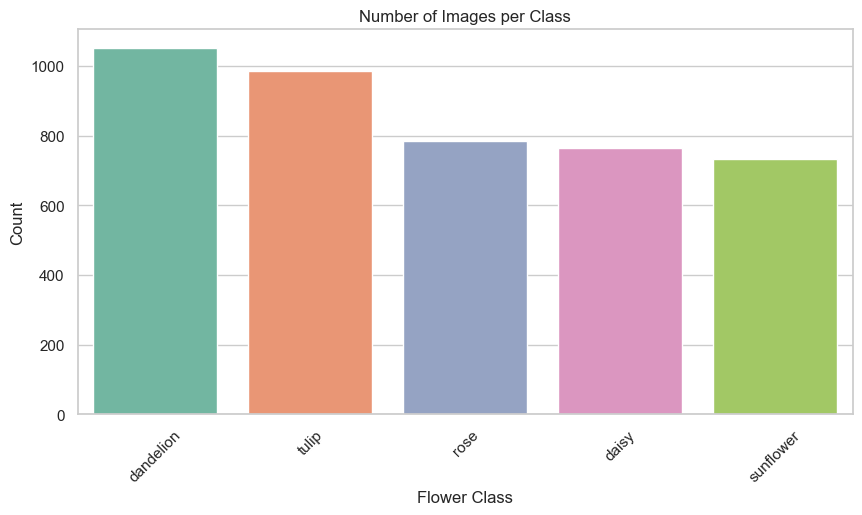

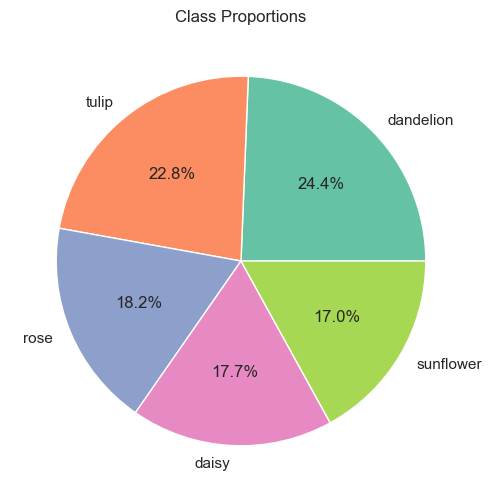

Class imbalance ratio: 1.44


In [4]:
class_counts = df['class'].value_counts()

# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")
plt.title("Number of Images per Class")
plt.xlabel("Flower Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Class Proportions")
plt.show()

# Class imbalance
imbalance_ratio = class_counts.max()/class_counts.min()
print(f"Class imbalance ratio: {imbalance_ratio:.2f}")

## 4. Image Dimensions & Aspect Ratio Analysis

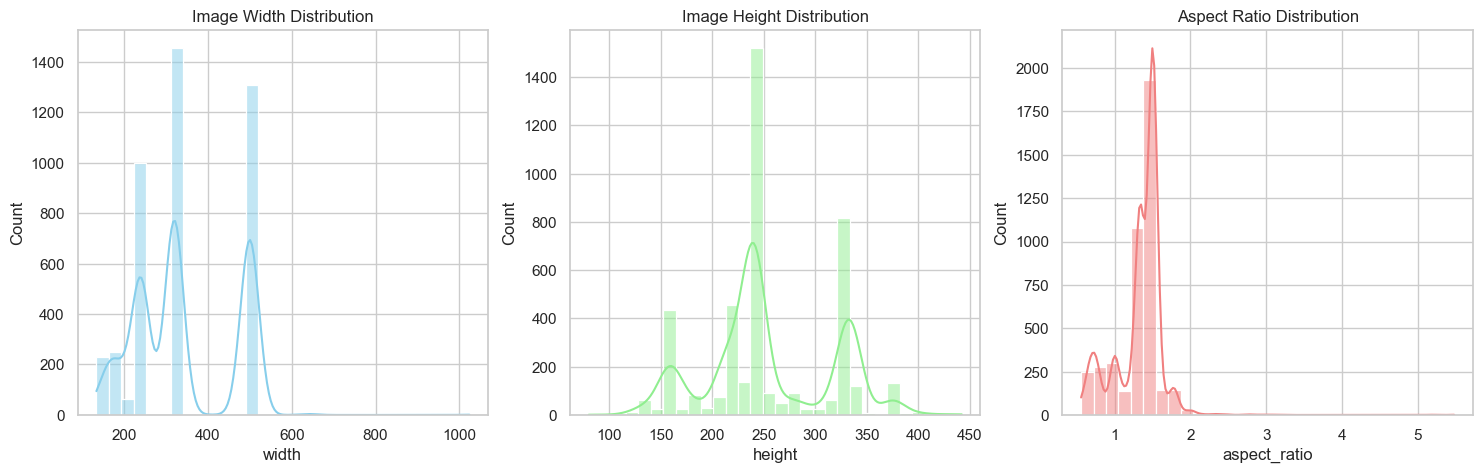

Top 5 most common image dimensions:
width  height
320    240       604
500    333       599
240    159       378
320    213       322
240    240       219
dtype: int64


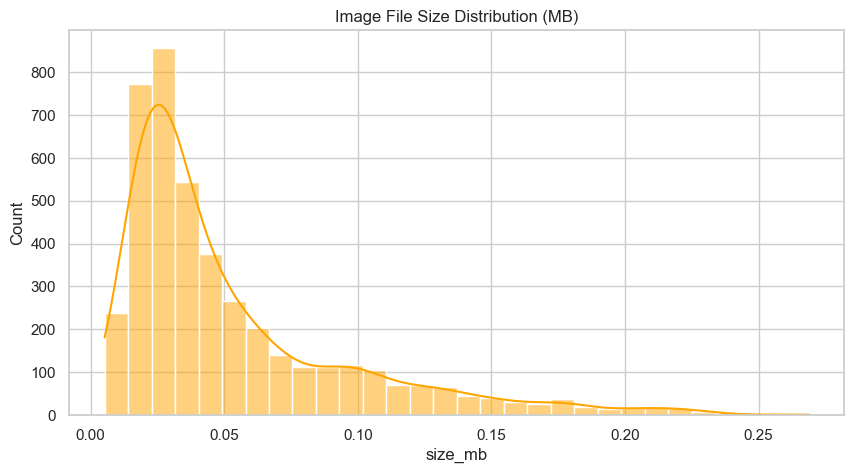

In [5]:
# Aspect ratio
df['aspect_ratio'] = df['width']/df['height']

# Histograms
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(df['width'], bins=30, ax=axes[0], color='skyblue', kde=True)
axes[0].set_title("Image Width Distribution")
sns.histplot(df['height'], bins=30, ax=axes[1], color='lightgreen', kde=True)
axes[1].set_title("Image Height Distribution")
sns.histplot(df['aspect_ratio'], bins=30, ax=axes[2], color='lightcoral', kde=True)
axes[2].set_title("Aspect Ratio Distribution")
plt.show()

# Top 5 most common dimensions
top_dims = df.groupby(['width','height']).size().sort_values(ascending=False).head(5)
print("Top 5 most common image dimensions:")
print(top_dims)

# File size distribution
plt.figure(figsize=(10,5))
sns.histplot(df['size_mb'], bins=30, color='orange', kde=True)
plt.title("Image File Size Distribution (MB)")
plt.show()

## 5. Sample Visualization

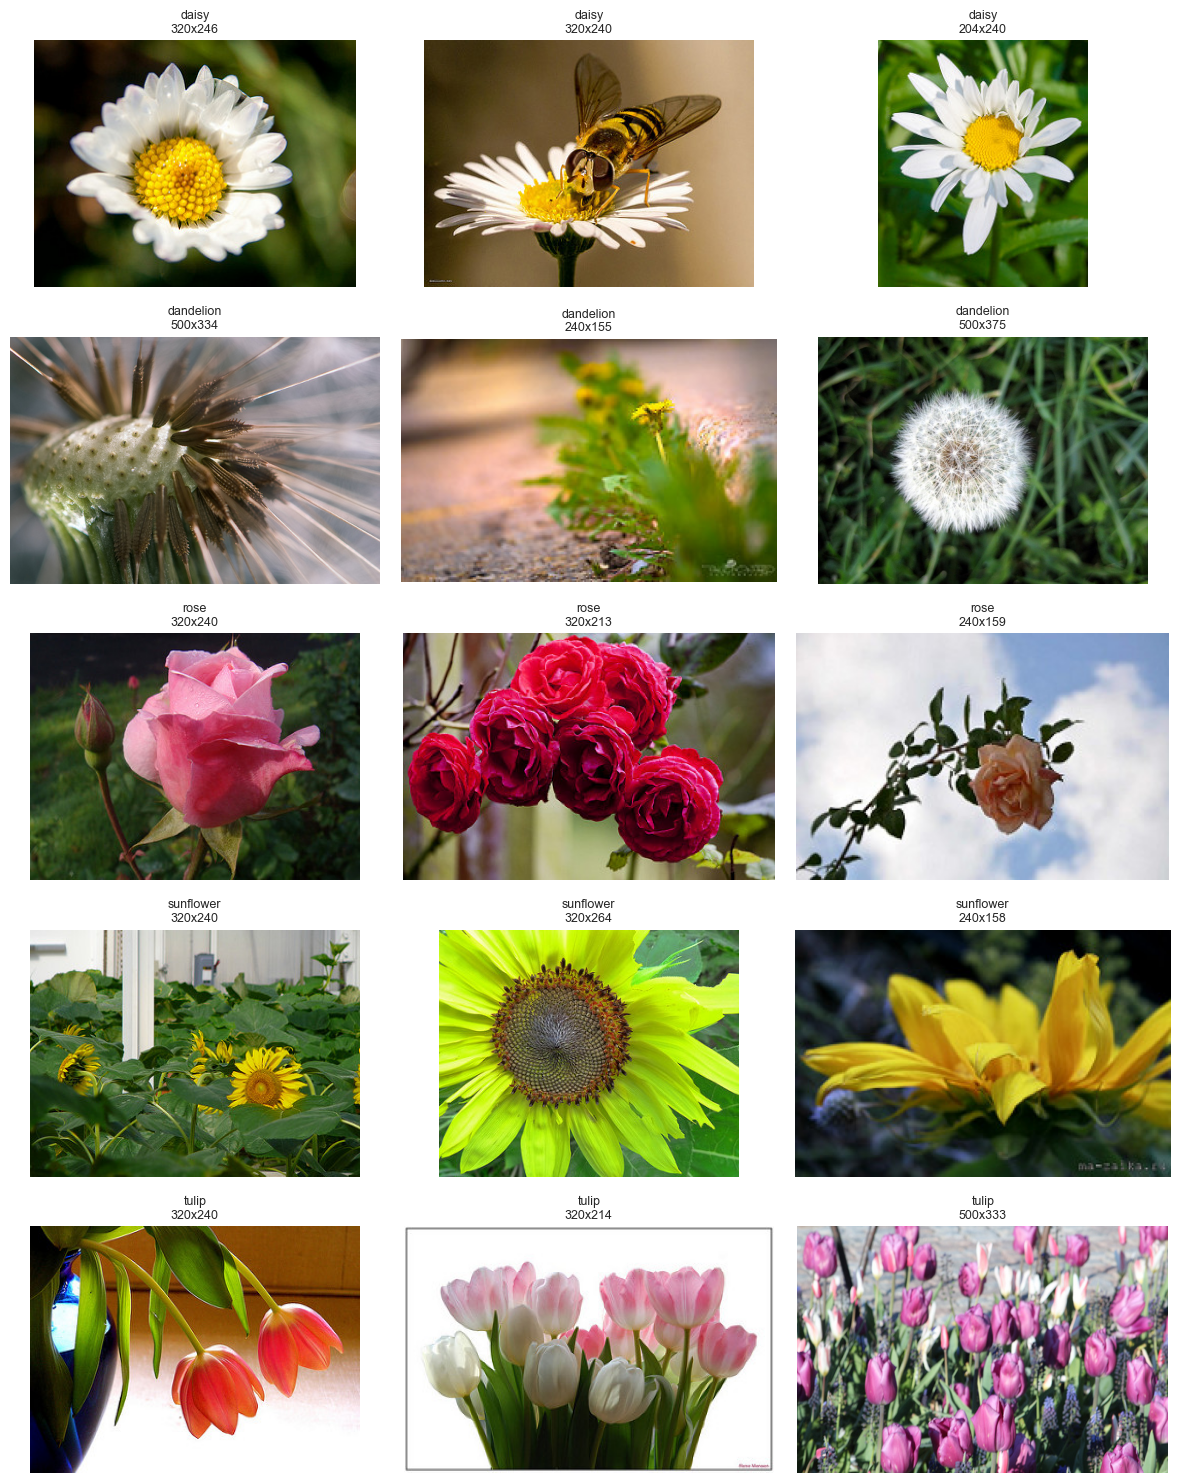

In [6]:
from random import sample
import matplotlib.image as mpimg

def display_samples(df, samples_per_class=3):
    classes = df['class'].unique()
    fig, axes = plt.subplots(len(classes), samples_per_class, figsize=(12, 3*len(classes)))
    for i, cls in enumerate(classes):
        sample_imgs = df[df['class']==cls].sample(samples_per_class)
        for j, (_, row) in enumerate(sample_imgs.iterrows()):
            img = Image.open(os.path.join(DATA_PATH, cls, row['filename']))
            axes[i,j].imshow(img)
            axes[i,j].axis('off')
            axes[i,j].set_title(f"{cls}\n{row['width']}x{row['height']}", fontsize=9)
    plt.tight_layout()
    plt.show()

display_samples(df, samples_per_class=3)

## 6. Data Quality Check

In [7]:
print("Data Quality Check")
print("="*30)

# Very small images
small_images = df[(df['width']<50) | (df['height']<50)]
print(f"Very small images (<50px): {len(small_images)}")

# Duplicate filenames
duplicates = df['filename'].duplicated().sum()
print(f"Duplicate filenames: {duplicates}")

# File extensions
extensions = df['filename'].str.split('.').str[-1].str.lower().value_counts()
print("File extensions distribution:")
print(extensions)

Data Quality Check
Very small images (<50px): 0
Duplicate filenames: 4
File extensions distribution:
filename
jpg    4317
Name: count, dtype: int64


## 7. Key Insights and Recommendations

In [8]:
print("KEY INSIGHTS FROM EDA")
print("="*50)

print(f"1. Dataset size: {len(df)} images across {df['class'].nunique()} classes")
print(f"2. Class imbalance ratio: {imbalance_ratio:.2f}")
print(f"3. Average dimensions: {df['width'].mean():.0f} x {df['height'].mean():.0f} pixels")
print(f"4. Average file size: {df['size_mb'].mean():.2f} MB")
print(f"5. Aspect ratio range: {df['aspect_ratio'].min():.2f} - {df['aspect_ratio'].max():.2f}")

KEY INSIGHTS FROM EDA
1. Dataset size: 4317 images across 5 classes
2. Class imbalance ratio: 1.44
3. Average dimensions: 338 x 253 pixels
4. Average file size: 0.05 MB
5. Aspect ratio range: 0.56 - 5.48


## Conclusion
The Flowers Recognition dataset contains five classes with mild imbalance and consistent image quality. Resizing to 224×224 and standard normalization are sufficient preprocessing steps. Given its size and structure, the dataset is well-suited for transfer learning with CNNs such as ResNet or VGG, which can be expected to achieve strong accuracy.